## Problem Statement :
You have a telecom firm which has collected data of all its customers. The main types of attributes are:

Demographics (age, gender etc.)
Services availed (internet packs purchased, special offers taken etc.)
Expenses (amount of recharge done per month etc.)
 

Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.

### step 1 : importing and merging the data

In [1]:
import pandas as pd 
import numpy as np


In [2]:
churn=pd.read_csv(r'C:\Users\user\Downloads\churn_data.csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
internet=pd.read_csv(r'C:\Users\user\Downloads\internet_data.csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
customer=pd.read_csv(r'C:\Users\user\Downloads\customer_data.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df=pd.merge(churn,internet,on='customerID',how='inner')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [6]:
df1=pd.merge(df,customer,how='inner',on='customerID')
df1.shape

(7043, 21)

### step 2 : Inspecting The Data Frame

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [8]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


In [9]:
df1.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


### Step 3 : Data Preparation 
converting some (yes/no) type variable to (1/0)

In [10]:
col=['PhoneService','PaperlessBilling','Churn','Dependents','Partner']
df1[col]=df1[col].apply(lambda x: x.map({'Yes':1,'No':0}))
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,...,No,Yes,No,No,No,No,Female,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,No,...,Yes,No,Yes,No,No,No,Male,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,...,Yes,Yes,No,No,No,No,Male,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,...,No,No,No,No,No,No,Female,0,0,0


In [11]:
# converting some other columns to dummy variables 

df2=pd.get_dummies(df1[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
df1=pd.concat([df1,df2],axis=1)
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,...,1,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,No,...,0,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,...,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,...,0,0,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,...,0,0,0,0,0,1,0,0,1,0


In [12]:
df1.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [13]:
for i in df1.columns:
    print(df1[i].value_counts())
    
    
    
    
    
    
    
    
    
    

8679-LZBMD    1
1169-SAOCL    1
2777-PHDEI    1
7547-EKNFS    1
2273-QCKXA    1
             ..
0621-TWIEM    1
8107-KNCIM    1
8514-VZHEB    1
9565-FLVCG    1
1465-VINDH    1
Name: customerID, Length: 7043, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64
20.2       11
           11
19.75       9
19.65       8
20.0

In [14]:
m1=pd.get_dummies(df1['MultipleLines'],prefix='MultipleLines')
m11=m1.drop('MultipleLines_No phone service',axis=1)
m11.head()
df1=pd.concat([df1,m11],axis=1)

In [15]:
os1=pd.get_dummies(df1['OnlineSecurity'],prefix='OnlineSecurity')
os11=os1.drop('OnlineSecurity_No internet service',axis=1)
os11.head()
df1=pd.concat([df1,os11],axis=1)

In [16]:
ob1=pd.get_dummies(df1['OnlineBackup'],prefix='OnlineBackup')
ob11=ob1.drop('OnlineBackup_No internet service',axis=1)
ob11.head()
df1=pd.concat([df1,ob11],axis=1)

In [17]:
ts1=pd.get_dummies(df1['TechSupport'],prefix='TechSupport')
ts11=ts1.drop('TechSupport_No internet service',axis=1)
df1=pd.concat([df1,ts11],axis=1)

In [18]:
st1=pd.get_dummies(df1['StreamingTV'],prefix='StreamingTV')
st11=st1.drop('StreamingTV_No internet service',axis=1)
df1=pd.concat([df1,st11],axis=1)

In [19]:
sm1=pd.get_dummies(df1['StreamingMovies'],prefix='StreamingMovies')
sm11=sm1.drop('StreamingMovies_No internet service',axis=1)
df1=pd.concat([df1,sm11],axis=1)

In [20]:
dp1=pd.get_dummies(df1['DeviceProtection'],prefix='DeviceProtection')
dp11=dp1.drop('DeviceProtection_No internet service',axis=1)
df1=pd.concat([df1,dp11],axis=1)

In [21]:
df1.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes'],
      dtype='object')

In [22]:
df1=df1.drop(['MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection','Contract','PaymentMethod','gender','InternetService'],axis=1)
df1.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [23]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [24]:
df1[df1['TotalCharges'].isna()]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
488,4472-LVYGI,0,0,1,52.55,NaN,0,0,1,1,...,1,0,0,1,0,1,1,0,0,1
753,3115-CZMZD,0,1,0,20.25,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,0,80.85,NaN,0,0,1,1,...,0,1,1,0,0,1,0,1,0,1
1082,4367-NUYAO,0,1,0,25.75,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,0,0,56.05,NaN,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
3331,7644-OMVMY,0,1,0,19.85,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,0,25.35,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,0,20.00,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,19.70,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,0,73.35,NaN,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1


In [25]:
df1['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [26]:
df1['TotalCharges']=df1['TotalCharges'].fillna(1397.475)

In [27]:
df1[df1['TotalCharges'].isna()]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [29]:
df1.describe(percentiles=[0.25,0.90,0.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370,0.162147,0.483033,0.299588,0.209144,...,0.438450,0.344881,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903,0.439443,0.343888
std,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561,0.368612,0.499748,0.458110,0.406726,...,0.496232,0.475363,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307,0.496355,0.475038
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,69.000000,1.000000,1.000000,102.600000,5973.690000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,8039.256000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4 : Test Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df1.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes'],
      dtype='object')

In [32]:
X=df1.drop(['customerID','Churn'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [33]:
y=df1.Churn
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Step 5 : scaling the values 


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
import warnings
warnings.filterwarnings('ignore')
X_train.head()
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
877,0.754422,0,0,-0.145568,0.350018,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,-0.379542,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
5334,0.673024,1,1,1.437668,1.329780,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0.775531,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
6578,-0.914247,1,0,0.298268,-0.703794,0,0,1,1,0,...,1,0,0,1,1,0,0,1,0,1


In [37]:
s=len(df1['Churn'].index)

In [38]:
#To find churn rate of this telecom service
rate=(sum(df1.Churn)/len(df1.Churn.index)*100)
rate

26.536987079369588

###  Step 6 : Looking at Correlation

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

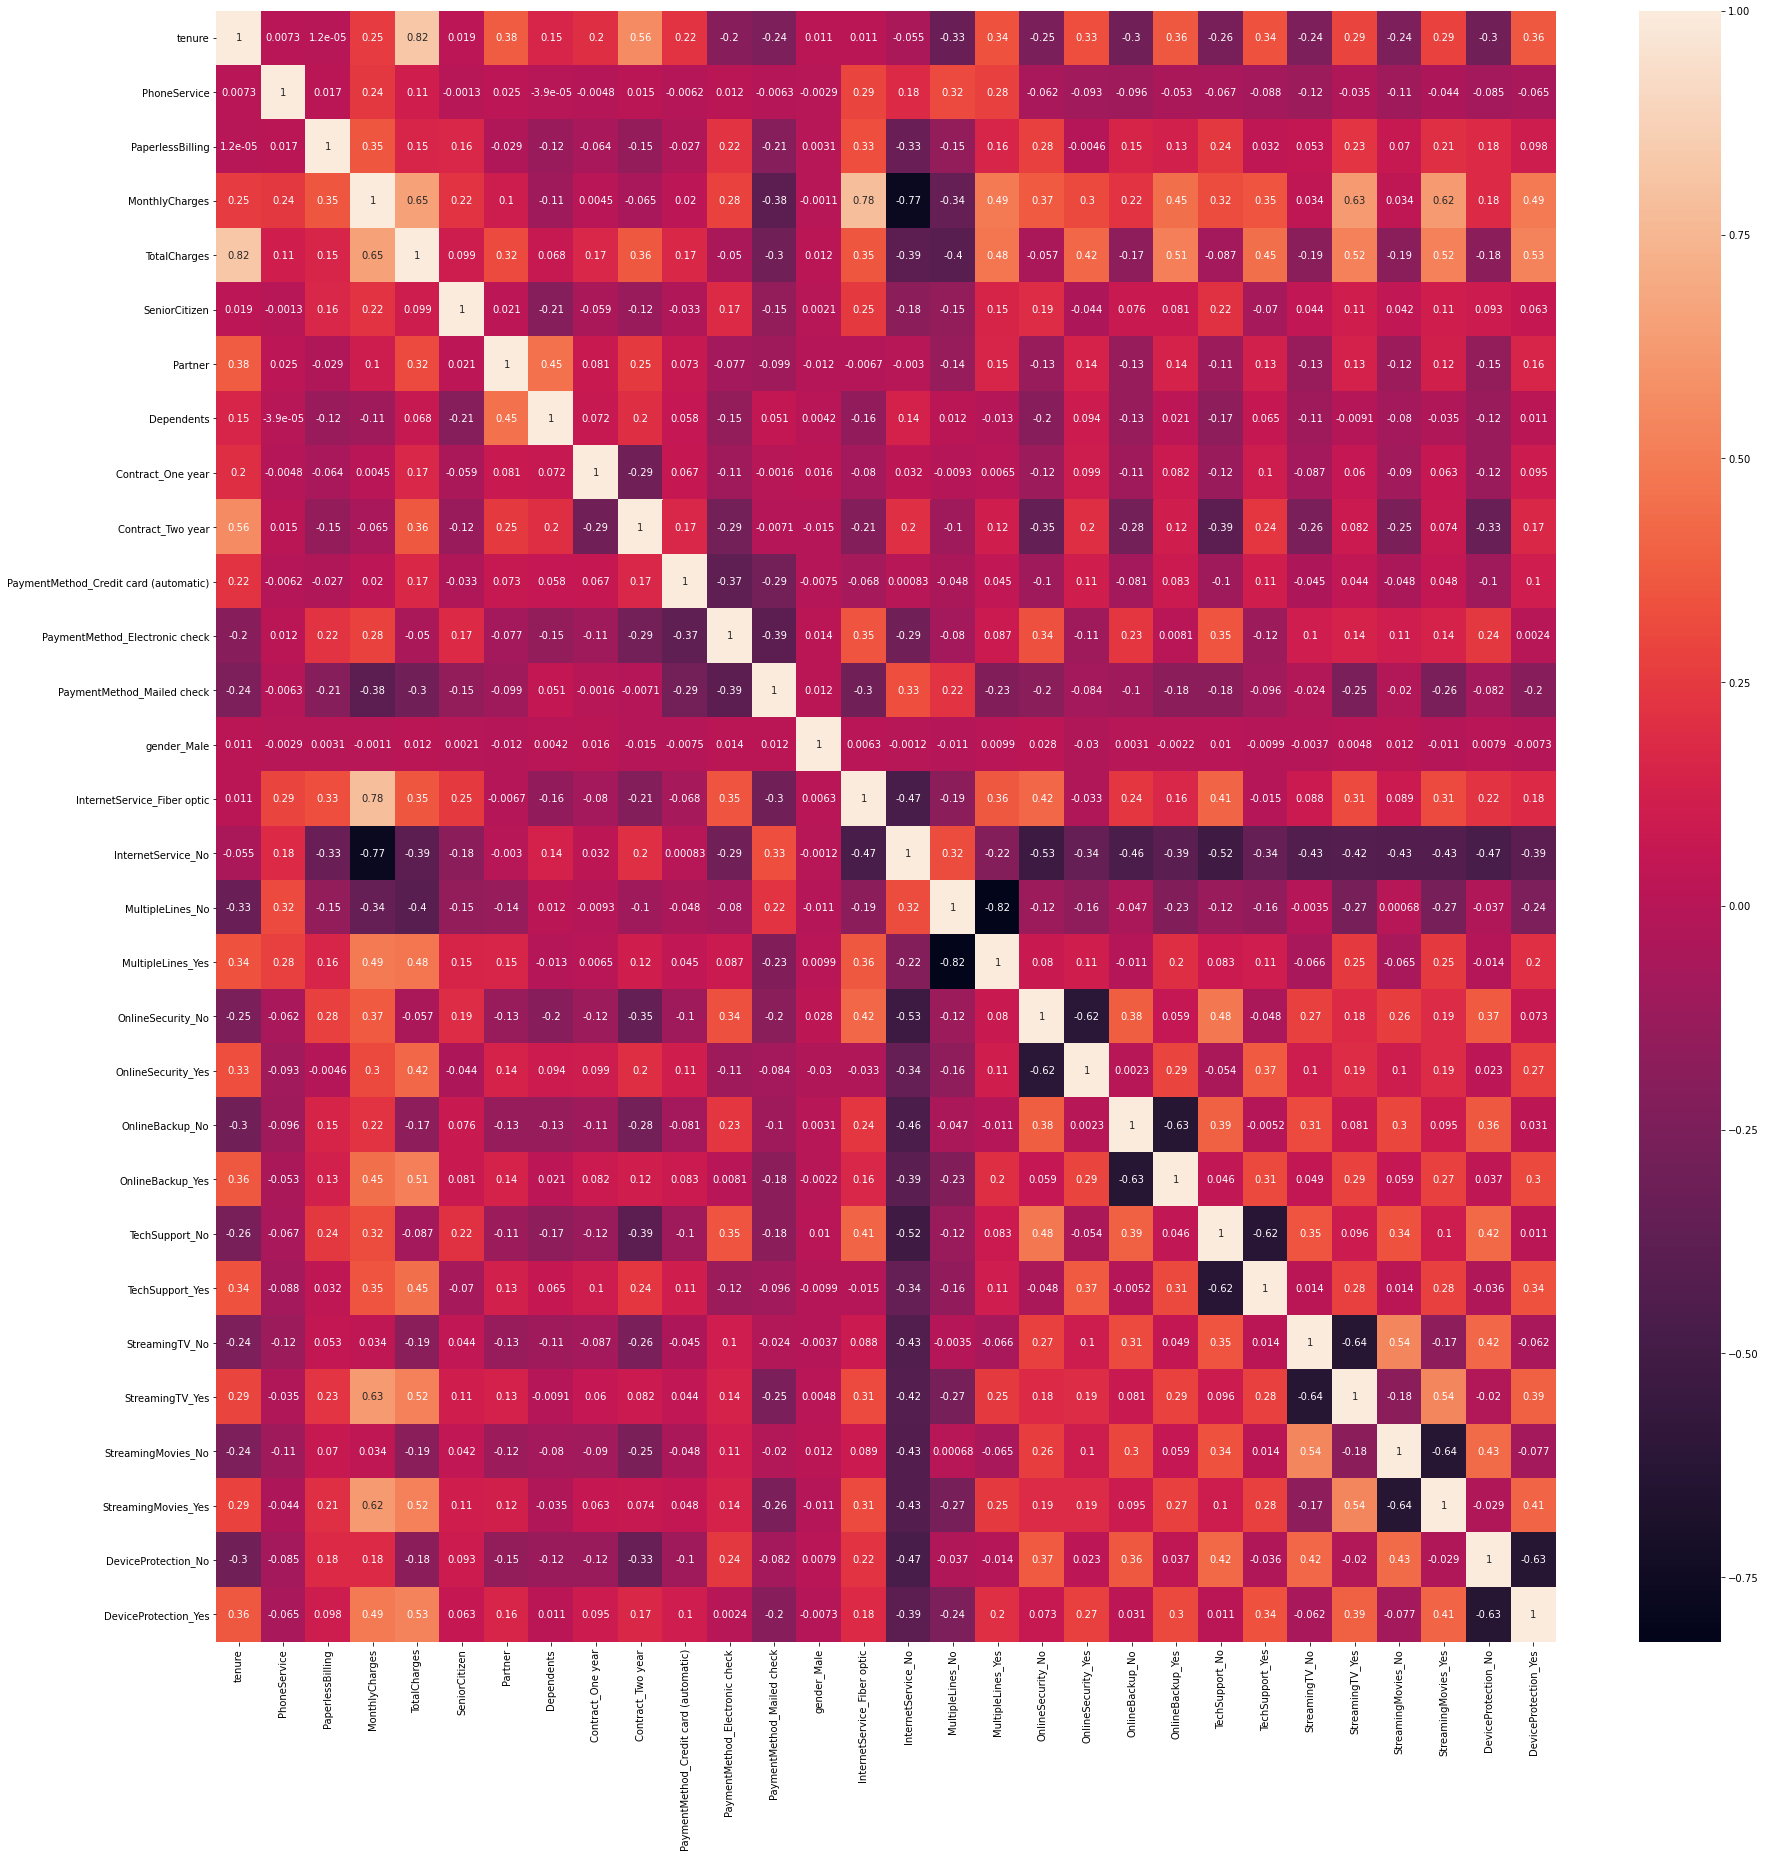

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [41]:
X_train=X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','StreamingTV_No','StreamingMovies_No','DeviceProtection_No','TechSupport_No'],axis=1)

In [42]:
X_test=X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','StreamingTV_No','StreamingMovies_No','DeviceProtection_No','TechSupport_No'],axis=1)

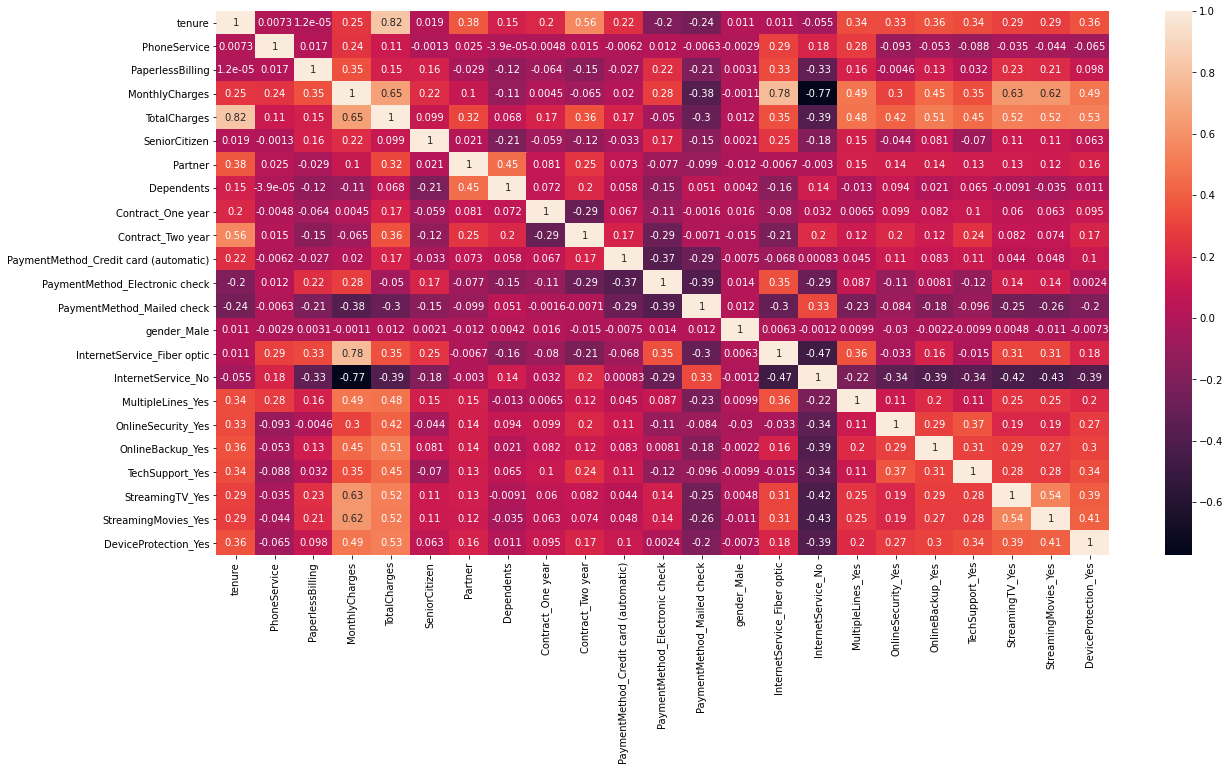

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [44]:
X_train.shape

(4930, 23)

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
X_train.corr()


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,DeviceProtection_Yes
tenure,1.000000,0.007254,0.000012,0.252985,0.824413,0.018955,0.377802,0.154035,0.197325,0.559552,0.218659,-0.202303,-0.239388,0.011371,0.010912,-0.054979,0.339052,0.330996,0.362259,0.338757,0.289502,0.285863,0.362992
PhoneService,0.007254,1.000000,0.017400,0.241879,0.111705,-0.001291,0.024788,-0.000039,-0.004764,0.015446,-0.006156,0.011649,-0.006318,-0.002942,0.288827,0.175804,0.280109,-0.092781,-0.053332,-0.087651,-0.034597,-0.043727,-0.065283
PaperlessBilling,0.000012,0.017400,1.000000,0.352970,0.153209,0.162176,-0.028613,-0.121860,-0.063582,-0.145445,-0.026974,0.220055,-0.205548,0.003087,0.325257,-0.327219,0.160172,-0.004632,0.129266,0.032244,0.226984,0.209655,0.098469
MonthlyCharges,0.252985,0.241879,0.352970,1.000000,0.654225,0.217867,0.099652,-0.105994,0.004518,-0.064534,0.020105,0.283150,-0.381925,-0.001148,0.783299,-0.770902,0.488941,0.303103,0.445754,0.349207,0.625259,0.624258,0.488468
TotalCharges,0.824413,0.111705,0.153209,0.654225,1.000000,0.099017,0.315660,0.068340,0.166527,0.363016,0.167772,-0.050172,-0.299457,0.012278,0.352943,-0.385624,0.475055,0.418236,0.511823,0.448345,0.523095,0.518870,0.526278
SeniorCitizen,0.018955,-0.001291,0.162176,0.217867,0.099017,1.000000,0.021033,-0.208897,-0.058635,-0.117637,-0.033406,0.174857,-0.147194,0.002141,0.252300,-0.182811,0.147139,-0.043596,0.081056,-0.069979,0.112273,0.114235,0.062975
Partner,0.377802,0.024788,-0.028613,0.099652,0.315660,0.021033,1.000000,0.454913,0.080758,0.251995,0.072731,-0.076912,-0.099296,-0.011833,-0.006679,-0.002982,0.154765,0.143775,0.142355,0.125195,0.134443,0.118350,0.156932
Dependents,0.154035,-0.000039,-0.121860,-0.105994,0.068340,-0.208897,0.454913,1.000000,0.071701,0.195975,0.057563,-0.147418,0.050862,0.004207,-0.159788,0.135245,-0.012537,0.093707,0.020709,0.064609,-0.009121,-0.034968,0.011171
Contract_One year,0.197325,-0.004764,-0.063582,0.004518,0.166527,-0.058635,0.080758,0.071701,1.000000,-0.294551,0.067037,-0.105946,-0.001607,0.016409,-0.080348,0.031791,0.006529,0.098968,0.082267,0.101031,0.060163,0.062803,0.094956
Contract_Two year,0.559552,0.015446,-0.145445,-0.064534,0.363016,-0.117637,0.251995,0.195975,-0.294551,1.000000,0.166126,-0.286197,-0.007130,-0.015238,-0.211304,0.204800,0.115445,0.197273,0.116495,0.237855,0.081934,0.073874,0.170566


In [46]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [47]:
log1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.4
Date:                Wed, 30 Dec 2020   Deviance:                       4016.7
Time:                        08:20:14   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9916      1.531     -1.954      0.051      -5.993       0.010
tenure                                   -1.3206      0.177     -7.473      0.000      -1.667      -0.974
PhoneService                              0.4140      0.786      0.527      0.598      -1.126       1.954
PaperlessBilling                          0.3449      0.090      3.824      0.000       0.168       0.522
MonthlyCharges                           -1.5312      1.162     -1.317      0.188      -3.809       0.747
TotalCharges                              0.5853      0.188      3.116      0.002       0.217       0.954
SeniorCitizen                             0.2945      0.103      2.873      0.004       0.094       0.495
Partner                                   0.0264      0.094      0.281      0.778      -0.158       0.211
Dependents                               -0.2223      0.108     -2.065      0.039      -0.433      -0.011
Contract_One year                        -0.6754      0.129     -5.221      0.000      -0.929      -0.422
Contract_Two year                        -1.3454      0.207     -6.493      0.000      -1.751      -0.939
PaymentMethod_Credit card (automatic)    -0.1526      0.138     -1.104      0.269      -0.423       0.118
PaymentMethod_Electronic check            0.2740      0.114      2.401      0.016       0.050       0.498
PaymentMethod_Mailed check               -0.0898      0.139     -0.647      0.518      -0.362       0.182
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.112
InternetService_Fiber optic               2.0253      0.967      2.095      0.036       0.130       3.920
InternetService_No                       -2.1792      0.977     -2.230      0.026      -4.094      -0.264
MultipleLines_Yes                         0.5545      0.215      2.581      0.010       0.133       0.976
OnlineSecurity_Yes                       -0.0424      0.217     -0.196      0.845      -0.467       0.382
OnlineBackup_Yes                         -0.0196      0.211     -0.093      0.926      -0.434       0.395
TechSupport_Yes                          -0.2526      0.219     -1.153      0.249      -0.682       0.177
StreamingTV_Yes                           0.7016      0.397      1.768      0.077      -0.076       1.479
StreamingMovies_Yes                       0.6712      0.396      1.694      0.090      -0.105       1.448
DeviceProtection_Yes                      0.2024      0.213      0.949      0.343      -0.216       0.620
=========================================================================================================
"""

### Step 7: Selecting Features Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [50]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [51]:
col=X_train.columns[rfe.support_]

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3),
 ('DeviceProtection_Yes', False, 6)]

In [53]:
X_train_sm= sm.add_constant(X_train[col])
m2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.9
Date:                Wed, 30 Dec 2020   Deviance:                       4027.8
Time:                        08:20:14   Pearson chi2:                 5.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0955      0.170     -6.434      0.000      -1.429      -0.762
tenure                            -1.3505      0.171     -7.887      0.000      -1.686      -1.015
PhoneService                      -0.6247      0.158     -3.957      0.000      -0.934      -0.315
PaperlessBilling                   0.3606      0.090      4.017      0.000       0.185       0.536
TotalCharges                       0.6289      0.180      3.493      0.000       0.276       0.982
SeniorCitizen                      0.3321      0.101      3.304      0.001       0.135       0.529
Contract_One year                 -0.6866      0.128     -5.352      0.000      -0.938      -0.435
Contract_Two year                 -1.3641      0.206     -6.612      0.000      -1.768      -0.960
PaymentMethod_Electronic check     0.3639      0.083      4.365      0.000       0.200       0.527
InternetService_Fiber optic        0.7770      0.119      6.551      0.000       0.545       1.009
InternetService_No                -0.9371      0.163     -5.732      0.000      -1.258      -0.617
MultipleLines_Yes                  0.3011      0.096      3.141      0.002       0.113       0.489
OnlineSecurity_Yes                -0.3063      0.102     -3.011      0.003      -0.506      -0.107
OnlineBackup_Yes                  -0.2787      0.093     -3.000      0.003      -0.461      -0.097
TechSupport_Yes                   -0.5047      0.104     -4.859      0.000      -0.708      -0.301
StreamingTV_Yes                    0.2300      0.095      2.424      0.015       0.044       0.416
==================================================================================================
"""

In [54]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

877     0.040629
5792    0.415728
5334    0.093502
878     0.027158
6578    0.106732
3090    0.494809
3043    0.735351
5028    0.041838
4463    0.709842
2822    0.063657
dtype: float64

In [55]:
y_train_pred=y_train_pred.values

In [56]:
comp=pd.DataFrame({'churn':y_train.values,'pred':y_train_pred})

comp.head()

,churn,pred
0,0,0.040629
1,1,0.415728
2,1,0.093502
3,0,0.027158
4,0,0.106732


In [57]:
comp['cust_ID']=y_train.index

In [58]:
comp.head()

,churn,pred,cust_ID
0,0,0.040629,877
1,1,0.415728,5792
2,1,0.093502,5334
3,0,0.027158,878
4,0,0.106732,6578


### To check if the model is predicting well 

In [59]:
comp['predicted_churn']=comp['pred'].apply(lambda x: 1 if x> 0.5 else 0)
comp.head()

,churn,pred,cust_ID,predicted_churn
0,0,0.040629,877,0
1,1,0.415728,5792,0
2,1,0.093502,5334,0
3,0,0.027158,878,0
4,0,0.106732,6578,0


### checking the accuracy of the model using confusion matrix

In [60]:
from sklearn import metrics


In [61]:
confusion=metrics.confusion_matrix(comp.churn,comp.predicted_churn)
confusion

array([[3257,  370],
       [ 550,  753]], dtype=int64)

In [62]:
print(metrics.accuracy_score(comp.churn,comp.predicted_churn))

0.8133874239350912


### calculating the VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=vif['VIF'].round(2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,PhoneService,9.15
3,TotalCharges,7.51
0,tenure,6.35
8,InternetService_Fiber optic,4.07
9,InternetService_No,3.32
6,Contract_Two year,3.23
2,PaperlessBilling,2.75
10,MultipleLines_Yes,2.52
14,StreamingTV_Yes,2.43
12,OnlineBackup_Yes,2.08


In [64]:
col=col.drop('PhoneService',1)

In [65]:
#model 3
X_train_sm= sm.add_constant(X_train[col])
m2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.7
Date:                Wed, 30 Dec 2020   Deviance:                       4043.4
Time:                        08:20:14   Pearson chi2:                 5.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5107      0.136    -11.144      0.000      -1.776      -1.245
tenure                            -1.2208      0.168     -7.259      0.000      -1.550      -0.891
PaperlessBilling                   0.3598      0.089      4.021      0.000       0.184       0.535
TotalCharges                       0.5061      0.178      2.849      0.004       0.158       0.854
SeniorCitizen                      0.3570      0.100      3.562      0.000       0.161       0.554
Contract_One year                 -0.7002      0.128     -5.468      0.000      -0.951      -0.449
Contract_Two year                 -1.3631      0.206     -6.618      0.000      -1.767      -0.959
PaymentMethod_Electronic check     0.3738      0.083      4.496      0.000       0.211       0.537
InternetService_Fiber optic        0.6187      0.110      5.621      0.000       0.403       0.834
InternetService_No                -1.1321      0.155     -7.322      0.000      -1.435      -0.829
MultipleLines_Yes                  0.2385      0.094      2.545      0.011       0.055       0.422
OnlineSecurity_Yes                -0.3198      0.102     -3.150      0.002      -0.519      -0.121
OnlineBackup_Yes                  -0.2652      0.093     -2.860      0.004      -0.447      -0.083
TechSupport_Yes                   -0.5164      0.104     -4.982      0.000      -0.720      -0.313
StreamingTV_Yes                    0.2673      0.094      2.832      0.005       0.082       0.452
==================================================================================================
"""

In [66]:
y_train_pred=res.predict(X_train_sm)
comp=pd.DataFrame({'churn':y_train.values,'pred':y_train_pred})
comp.head()

,churn,pred
877,0,0.028643
5792,1,0.416840
5334,1,0.089490
878,0,0.031965
6578,0,0.114180


In [67]:
comp['cust_ID']=y_train.index
comp['predicted_churn']=comp['pred'].apply(lambda x: 1 if x> 0.5 else 0)
comp.head()

,churn,pred,cust_ID,predicted_churn
877,0,0.028643,877,0
5792,1,0.416840,5792,0
5334,1,0.089490,5334,0
878,0,0.031965,878,0
6578,0,0.114180,6578,0


In [68]:
confusion=metrics.confusion_matrix(comp.churn,comp.predicted_churn)
confusion

array([[3265,  362],
       [ 563,  740]], dtype=int64)

In [69]:
print(metrics.accuracy_score(comp.churn,comp.predicted_churn))


0.8123732251521298


In [70]:
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=vif['VIF'].round(2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
2,TotalCharges,7.42
0,tenure,6.24
7,InternetService_Fiber optic,3.14
5,Contract_Two year,3.08
1,PaperlessBilling,2.62
13,StreamingTV_Yes,2.41
8,InternetService_No,2.31
9,MultipleLines_Yes,2.28
11,OnlineBackup_Yes,2.02
12,TechSupport_Yes,1.98


In [71]:
#model 4
col=col.drop('TotalCharges')

In [72]:
X_train_sm= sm.add_constant(X_train[col])
m2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Wed, 30 Dec 2020   Deviance:                       4051.9
Time:                        08:20:15   Pearson chi2:                 5.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6007      0.131    -12.189      0.000      -1.858      -1.343
tenure                            -0.7883      0.066    -11.953      0.000      -0.918      -0.659
PaperlessBilling                   0.3558      0.089      3.982      0.000       0.181       0.531
SeniorCitizen                      0.3595      0.101      3.574      0.000       0.162       0.557
Contract_One year                 -0.6885      0.127     -5.409      0.000      -0.938      -0.439
Contract_Two year                 -1.3302      0.204     -6.510      0.000      -1.731      -0.930
PaymentMethod_Electronic check     0.3670      0.083      4.406      0.000       0.204       0.530
InternetService_Fiber optic        0.7660      0.097      7.892      0.000       0.576       0.956
InternetService_No                -1.1347      0.154     -7.359      0.000      -1.437      -0.832
MultipleLines_Yes                  0.2858      0.092      3.108      0.002       0.106       0.466
OnlineSecurity_Yes                -0.2838      0.101     -2.813      0.005      -0.481      -0.086
OnlineBackup_Yes                  -0.2225      0.092     -2.430      0.015      -0.402      -0.043
TechSupport_Yes                   -0.4737      0.103     -4.612      0.000      -0.675      -0.272
StreamingTV_Yes                    0.3479      0.090      3.861      0.000       0.171       0.524
==================================================================================================
"""

In [73]:
y_train_pred=res.predict(X_train_sm)
comp=pd.DataFrame({'churn':y_train.values,'pred':y_train_pred})
comp.head()

,churn,pred
877,0,0.035796
5792,1,0.421518
5334,1,0.083011
878,0,0.036358
6578,0,0.115060


In [74]:
comp['cust_ID']=y_train.index
comp['predicted_churn']=comp['pred'].apply(lambda x: 1 if x> 0.5 else 0)
comp.head()

,churn,pred,cust_ID,predicted_churn
877,0,0.035796,877,0
5792,1,0.421518,5792,0
5334,1,0.083011,5334,0
878,0,0.036358,878,0
6578,0,0.115060,6578,0


In [75]:
confusion=metrics.confusion_matrix(comp.churn,comp.predicted_churn)
confusion

array([[3265,  362],
       [ 573,  730]], dtype=int64)

In [76]:
print(metrics.accuracy_score(comp.churn,comp.predicted_churn))

0.8103448275862069


In [77]:
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=vif['VIF'].round(2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
4,Contract_Two year,2.98
6,InternetService_Fiber optic,2.74
1,PaperlessBilling,2.55
8,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.24
10,OnlineBackup_Yes,1.98
11,TechSupport_Yes,1.96
7,InternetService_No,1.92
0,tenure,1.90
5,PaymentMethod_Electronic check,1.83


### Checking other ratios too 

In [78]:
tn=confusion[0,0]
tp=confusion[1,1]
fp=confusion[0,1]
fn=confusion[1,0]

In [79]:
sensitivity=tp/float(fn+tp)
sensitivity

0.5602455871066769

In [80]:
specificity=tn/float(tn+fp)
specificity

0.9001929969671905

In [81]:
a=fp/float(fp+tn)
a

0.09980700303280948

In [82]:
b=tp/float(fp+tp)
b

0.6684981684981685

In [83]:
c=tn/float(tn+fn)
c

0.8507034914017717

### step 9 : Drawing ROC curve

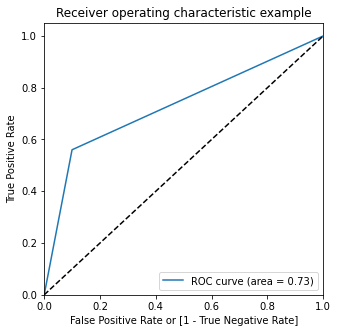

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(comp.churn,comp.predicted_churn)

In [85]:
# finding the best fit point from the ROC curve
number=[float(x)/10 for x in range(10)]
for i in number:
    comp[i]=comp.pred.map(lambda x: 1 if x>i else 0)
comp.head()

,churn,pred,cust_ID,predicted_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
877,0,0.035796,877,0,1,0,0,0,0,0,0,0,0,0
5792,1,0.421518,5792,0,1,1,1,1,1,0,0,0,0,0
5334,1,0.083011,5334,0,1,0,0,0,0,0,0,0,0,0
878,0,0.036358,878,0,1,0,0,0,0,0,0,0,0,0
6578,0,0.115060,6578,0,1,1,0,0,0,0,0,0,0,0


In [86]:
cut_off=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
# making a comparison of sensiivity specificity accuracy and probablity
from sklearn.metrics import confusion_matrix 
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=confusion_matrix(comp.churn,comp[i])
    tot=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/tot
    sesi=cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cut_off.loc[i]=[i,accuracy,sesi,speci]
print(cut_off)


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.264300     1.000000     0.000000
0.1   0.1  0.616430     0.940138     0.500138
0.2   0.2  0.723529     0.859555     0.674662
0.3   0.3  0.772008     0.768227     0.773366
0.4   0.4  0.801623     0.676899     0.846430
0.5   0.5  0.810345     0.560246     0.900193
0.6   0.6  0.801217     0.409823     0.941825
0.7   0.7  0.782556     0.238680     0.977943
0.8   0.8  0.745436     0.046815     0.996416
0.9   0.9  0.735700     0.000000     1.000000


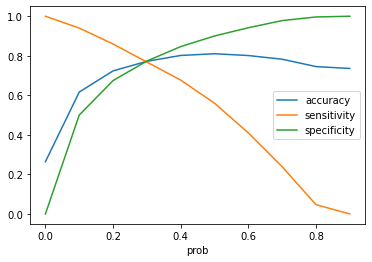

In [87]:
cut_off.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

###  0.3 is the intersecting point so thats the best transition value

In [88]:
# Final model
comp=pd.DataFrame({'churn':y_train.values,'pred':y_train_pred})
comp['cust_ID']=y_train.index
comp['predicted_churn']=comp['pred'].apply(lambda x: 1 if x> 0.3 else 0)
comp.head()


,churn,pred,cust_ID,predicted_churn
877,0,0.035796,877,0
5792,1,0.421518,5792,1
5334,1,0.083011,5334,0
878,0,0.036358,878,0
6578,0,0.115060,6578,0


In [89]:
#confusion matrix of final model
cm=(metrics.confusion_matrix(comp.churn,comp.predicted_churn))
cm

array([[2805,  822],
       [ 302, 1001]], dtype=int64)

In [90]:
# precision and recall
#precision is same as positive predicted value
pres=cm[1,1]/(cm[1,1]+cm[0,1])
pres

0.5490948985189249

In [91]:
recall=cm[1,1]/(cm[1,1]+cm[1,0])
recall

0.7682271680736761

In [92]:
# can be done in this way 
from sklearn.metrics import precision_score,recall_score
print(precision_score(comp.churn,comp.predicted_churn))
print(recall_score(comp.churn,comp.predicted_churn))


0.5490948985189249
0.7682271680736761


In [93]:

# making a comparison of sensiivity specificity accuracy and probablity

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    comp[i]=comp.pred.map(lambda x: 1 if x>i else 0)
    cut_off['precision']=precision_score(comp.churn,comp[i])
    cut_off['recall']=recall_score(comp.churn,comp[i])
print(cut_off)


     prob  accuracy  sensitivity  specificity  precision  recall
0.0   0.0  0.264300     1.000000     0.000000        0.0     0.0
0.1   0.1  0.616430     0.940138     0.500138        0.0     0.0
0.2   0.2  0.723529     0.859555     0.674662        0.0     0.0
0.3   0.3  0.772008     0.768227     0.773366        0.0     0.0
0.4   0.4  0.801623     0.676899     0.846430        0.0     0.0
0.5   0.5  0.810345     0.560246     0.900193        0.0     0.0
0.6   0.6  0.801217     0.409823     0.941825        0.0     0.0
0.7   0.7  0.782556     0.238680     0.977943        0.0     0.0
0.8   0.8  0.745436     0.046815     0.996416        0.0     0.0
0.9   0.9  0.735700     0.000000     1.000000        0.0     0.0


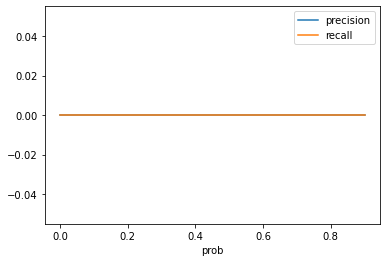

In [94]:
cut_off.plot.line(x='prob',y=['precision','recall'])
plt.show()

### Step 11 : testing the model on test set

In [95]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [96]:
X_test=X_test[col]

In [97]:
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes
4880,0.713723,0,0,0,1,0,0,1,0,0,0,0,0
1541,1.609107,0,0,0,1,0,0,1,0,0,0,0,0
1289,1.242814,0,0,1,0,0,0,0,1,1,1,1,0
5745,1.161415,1,0,0,1,0,0,1,1,0,0,0,0
4873,-1.036345,0,0,0,0,0,0,1,0,0,0,0,0


In [98]:
X_test_sm=sm.add_constant(X_test)

In [99]:
y_test_pred=res.predict(X_test_sm)

In [100]:
y_test_pred.head()

4880    0.009678
1541    0.004802
1289    0.018651
5745    0.012876
4873    0.128044
dtype: float64

In [101]:
y_pred_df=pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4880,0.009678
1541,0.004802
1289,0.018651
5745,0.012876
4873,0.128044


In [102]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Churn
4880,0
1541,0
1289,0
5745,0
4873,0


In [103]:
y_test_df['cust_id']=y_test_df.index

In [104]:
y_test_df.head()

,Churn,cust_id
4880,0,4880
1541,0,1541
1289,0,1289
5745,0,5745
4873,0,4873


In [105]:
y_test_final=pd.concat([y_test_df,y_pred_df],axis=1)
y_test_final.head()

,Churn,cust_id,0
4880,0,4880,0.009678
1541,0,1541,0.004802
1289,0,1289,0.018651
5745,0,5745,0.012876
4873,0,4873,0.128044


In [106]:
y_test_final.reset_index(drop=True,inplace=True)
y_test_final.head()

,Churn,cust_id,0
0,0,4880,0.009678
1,0,1541,0.004802
2,0,1289,0.018651
3,0,5745,0.012876
4,0,4873,0.128044


In [107]:
y_test_pred=y_test_final.rename(columns={0:'churn_prob'})

In [108]:
y_test_pred.head()

,Churn,cust_id,churn_prob
0,0,4880,0.009678
1,0,1541,0.004802
2,0,1289,0.018651
3,0,5745,0.012876
4,0,4873,0.128044


In [109]:
y_test_pred=y_test_pred.reindex_axis(['cust_id','Churn','churn_prob'],axis=1)
y_test_pred.head()

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [ ]:
y_test_pred['final_pred']=y_test_pred['churn_prob'].apply(lambda x: 1 if x> 0.3 else 0)
y_test_pred.head()

In [ ]:
# testing the accuracy
metrics.accuracy_score(y_test_pred.Churn,y_test_pred.final_pred)

In [ ]:
confusion_2=metrics.confusion_matrix(y_test_pred.Churn,y_test_pred.final_pred)

In [ ]:
confusion_2

In [ ]:
sensitivity=confusion_2[1,1]/(confusion_2[1,1]+confusion_2[1,0])
sensitivity

In [ ]:
specificity=confusion_2[0,0]/(confusion[0,0]+confusion[0,1])
specificity

In [ ]:
precision=confusion_2[1,1]/(confusion[1,1]+confusion[0,1])
precision

In [ ]:
recall=confusion_2[1,1]/(confusion[1,1]+confusion[1,0])
recall